In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv("car.csv")
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [20]:
print("Missing Values Before Handling:")
print(df.isnull().sum())
print(df.shape)
print("number of rows",df.shape[0])
print("number of cols",df.shape[1])
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Variables in the Dataset:")
print(numerical_columns)
cat_columns=df.select_dtypes(include=['object']).columns
print("cat Variables in the Dataset:")
print(cat_columns)

Missing Values Before Handling:
Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64
(

In [12]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
df_cleaned = df.drop_duplicates()
print(df_cleaned.shape)


Number of duplicate rows: 18
(5058, 18)


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Engine Information.Driveline'] = le.fit_transform(df['Engine Information.Driveline'])
df['Identification.Classification'] = le.fit_transform(df['Identification.Classification'])
df['Engine Information.Hybrid'] = le.fit_transform(df['Engine Information.Hybrid'])


In [23]:
X = df[['Engine Information.Driveline', 'Engine Information.Hybrid', 'Identification.Classification',
        'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']]

y = df['Fuel Information.City mpg']


In [15]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Size:", X_train.shape)
print("Testing Data Size:", X_test.shape)


Training Data Size: (4060, 5)
Testing Data Size: (1016, 5)


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [21]:

model.fit(X_train, y_train)

# Get Coefficients & Intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 25.24373325225445
Coefficients: [ 1.94374677e-01 -6.27969898e-16  1.83772992e+00 -2.35592949e-03
 -2.97125596e-02]


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 2.1793824883973643
Mean Squared Error (MSE): 8.208129436638709
R² Score: 0.5956846228933002


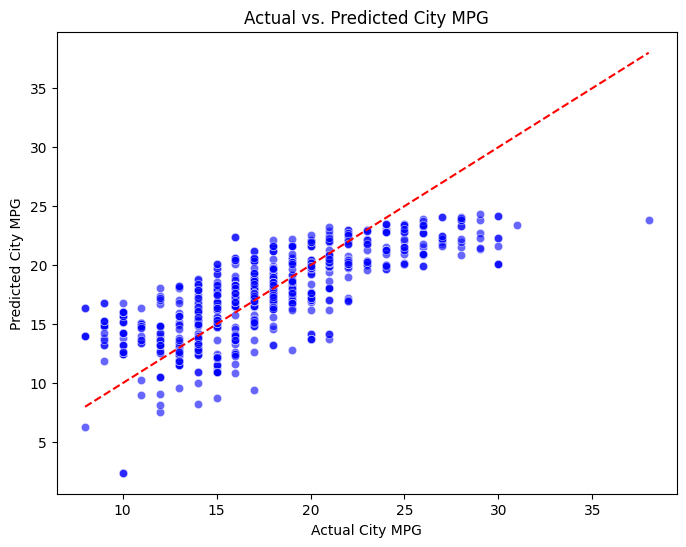

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))


sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')

plt.xlabel("Actual City MPG")
plt.ylabel("Predicted City MPG")
plt.title("Actual vs. Predicted City MPG")


plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)


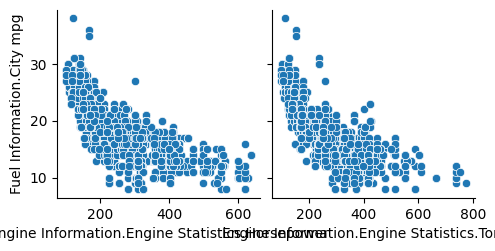

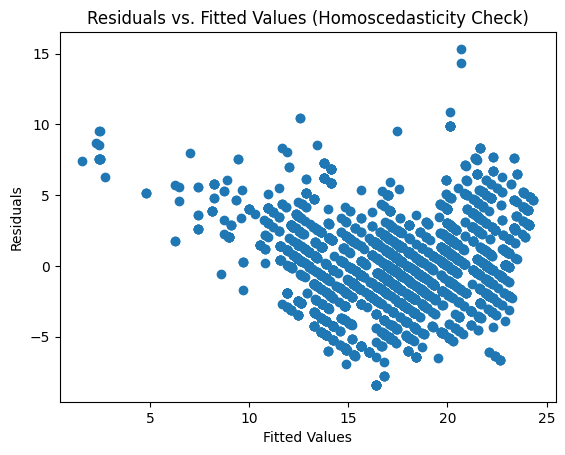

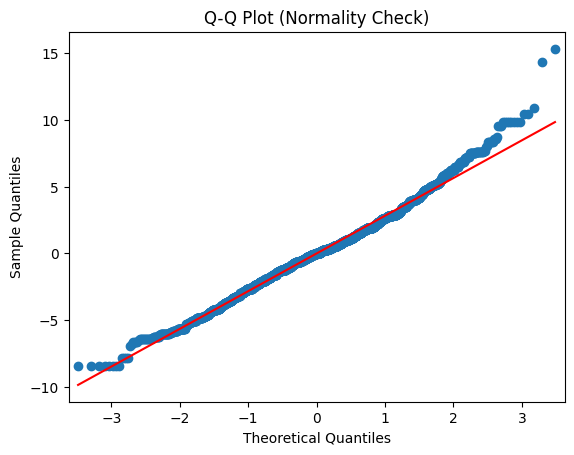

VIF: [1.0, 1.0252050992333572, nan, 1.1027527947140168, 8.329575415300573, 8.598054790043523]


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Fit the model using statsmodels for more comprehensive diagnostics
X_train_sm = sm.add_constant(X_train)  # Add a constant for the intercept term
model_sm = sm.OLS(y_train, X_train_sm).fit()

# 1. Linearity: Check scatter plots of predictors vs. target
# (You can visually inspect these plots or calculate correlation coefficients)
sns.pairplot(df, x_vars=['Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque'], y_vars=['Fuel Information.City mpg'])
plt.show()

# 2. Independence: Assumed based on data collection (not explicitly checked)

# 3. Homoscedasticity: Check residuals vs. fitted values plot
plt.scatter(model_sm.fittedvalues, model_sm.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values (Homoscedasticity Check)")
plt.show()

# 4. Normality: Check Q-Q plot of residuals
sm.qqplot(model_sm.resid, line='s')
plt.title("Q-Q Plot (Normality Check)")
plt.show()

# 5. Multicollinearity: Check Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_sm, i) for i in range(X_train_sm.shape[1])]
print("VIF:", vif)  # Values above 5 or 10 might indicate multicollinearity

# ... (rest of your code) ...